Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". (After you have done that, you can delete the 'raise NotImplementedError()' line, and then run your code to check that it works).

Also, enter your NAME in the next cell.


In [12]:
NAME = "Kuldeep Singh"

---

# ICT706 SouthBank 2020 Semester 1 Task 2

This assignment will be done completely inside this Jupyter notebook.

### Background
A medium-size company has given you one year of data about the online purchases that their customers have made.  They want you to analyse the data using statistical and machine learning techniques and produce:
* a prediction algorithm for predicting how much money each customer is likely to spend in a year;
* a classification algorithm for predicting which customers will be 'big spenders';
* some recommendations on what marketing strategy they should use to attract more 'big spender' customers.

### Instructions
Follow all the instructions in this notebook to complete these tasks.  Note that some cells contain 'assert' statements - these will automatically mark your work so that you can check that you have done the preceeding steps correctly.  (If they give errors, then go back and correct your previous work until you fix those errors.  Once those 'assert' cells execute without errors, you know that you have achieved the marks for that step.) 

When you have finished, this notebook is the only file that you will need to submit to Blackboard.

Note: If you want some space to try out some Python code of your own, feel free to add extra cells into this notebook.  Just make sure that before you submit your notebook, that those extra cells execute without error, or that you delete them before submitting.

### Overview
You have five sections to complete in this Notebook (total = 100 marks):
* Part A: Load and Clean Data (20 points)
* Part B Data Exploration (30 points)
* Part C: Predicting Spending Levels (20 points)
* Part D: Predicting Big Spenders (20 points)
* Part E: Business Recommendations (10 points)

In [13]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install numpy
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

---
# Part A: Load and Clean Data (20 points)

Save your CSV data file into the same folder as this notebook.

Write Python code to load your dataset into a Pandas DataFrame called 'sales'.

In [39]:
# YOUR CODE HERE
sales = pd.read_csv('GreenHat_Sales.csv')

After you have loaded the data correctly, you should have 10,000 rows. 
Run the following cells and tests to check that you have done this correctly.

In [40]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$1660.80
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$3041.10
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40


In [42]:
"""Check that 'sales' has the right shape and number of rows (5 points)."""
assert len(sales.columns) == 10
assert sales.columns[0] == "CustNum"
assert sales.shape == (10000, 10)

## Cleaning the Data

Some of the columns are strings, with dollar signs.  But we need to convert them to numbers (float) so that we can do calculations on them.  The next cell shows what will go wrong if we try doing calculations *before* converting them floats!

In [43]:
s2 = sales["Spend"] * 4
s2.head()

0    $1615.00$1615.00$1615.00$1615.00
1    $1927.20$1927.20$1927.20$1927.20
2    $1660.80$1660.80$1660.80$1660.80
3    $3041.10$3041.10$3041.10$3041.10
4    $1764.40$1764.40$1764.40$1764.40
Name: Spend, dtype: object

In [44]:
# Complete the following remove_dollar function 
# so that it removes any dollar signs and spaces
# and then returns the string as a number (float).
def remove_dollar(s):
    v = ""
    for i in range(len(s)):
        if s[i] !=' ' and s[i] != '$':
            v = v + s[i]
    return float(v)

In [21]:
"""Check that remove_dollar() removes dollars and spaces properly (5 points)."""
assert remove_dollar("12") == 12.0
assert remove_dollar("$123") == 123.0
assert remove_dollar("  $1234") == 1234.0
assert remove_dollar(" $42.3 ") == 42.3

## Clean up the Spend columns

Apply your remove_dollar function to the "Spend" column (every row), and put the cleaned-up float values into a new column of your 'sales' DataFrame called **"SpendValue"**.

Then do the same for the "LastSpend" column and put the float values into a new column called **"LastSpendValue"**.

In [45]:
# YOUR CODE HERE
SpendValue = []
for i in range (10000):
    SpendValue.append(remove_dollar(sales.iloc[i,9]))
sales ['SpendValue'] = SpendValue
LastSpendValue = []
for i in range (10000):
    LastSpendValue.append(remove_dollar(sales.iloc[i,7]))
sales ['LastSpendValue'] = LastSpendValue

In [24]:
sales.dtypes

CustNum             int64
Name               object
Sex                object
Age                 int64
State              object
Income              int64
Clicks              int64
LastSpend          object
Purchases           int64
Spend              object
SpendValue        float64
LastSpendValue    float64
dtype: object

In [25]:
# check the new SpendValue columns (5 points)
assert sales.columns.contains("SpendValue")
assert sales.columns.contains("LastSpendValue")
# check that they are floats
assert sales["SpendValue"].dtype == "float64"
assert sales["LastSpendValue"].dtype == "float64"
# check that the values are greater than zero.
assert (sales["SpendValue"] > 0.0).all()
assert (sales["LastSpendValue"] >= 0.0).all()

AttributeError: 'Index' object has no attribute 'contains'

## Make Sex and State numeric

To use the Sex and State columns as input features for the machine learning algorithms in Scikit-Learn they must be numeric.

Use the **LabelEncoder** object from the sklearn.preprocessing package to convert the 'Sex' column into an integer column called **"SexValue"**.  

Also convert the "State" column into a integer column called **"StateValue"**. 

In [46]:
# YOUR CODE HERE
labelencoder = preprocessing.LabelEncoder()
sales['SexValue'] = labelencoder.fit_transform(sales['Sex'])
sales['StateValue'] = labelencoder.fit_transform(sales['State'])

In [47]:
# see if Sex has been mapped to ints properly?
cols = ["Name", "Sex", "SexValue"]
sales[cols].head()

,Name,Sex,SexValue
0,Brandon Bender,male,1
1,Andre Mccormick,male,1
2,Ashley Smith,female,0
3,Ann Riley,female,0
4,Timothy Chavez,male,1


In [48]:
# see if State has been mapped to ints properly?
cols = ["Name", "State", "StateValue"]
sales[cols].head(10)

,Name,State,StateValue
0,Brandon Bender,NSW,1
1,Andre Mccormick,VIC,6
2,Ashley Smith,NSW,1
3,Ann Riley,NSW,1
4,Timothy Chavez,NSW,1
5,John Bennett,VIC,6
6,Teresa Wise,QLD,3
7,Andrew Nelson,QLD,3
8,Jon Aguilar,NSW,1
9,Priscilla Briggs,NSW,1


In [ ]:
# test the new SexValue and StateValue columns (5 points)
assert sales.columns.contains("SexValue")
assert sales.columns.contains("StateValue")
# check that they are integer
assert str(sales["SexValue"].dtype).startswith("int")   # "int32" or "int64"
assert str(sales["StateValue"].dtype).startswith("int") # "int32" or "int64"
# check that the values are greater than zero.
assert sales["SexValue"].max() == 1    # 0 and 1 only
assert sales["StateValue"].max() == 7  # 7 states in Australia

In [49]:
# Finally, let us view just the numeric columns.
numcols = ["CustNum", "SexValue", "Age", "StateValue",
           "Income", "Clicks", "Purchases", "SpendValue"]
sales[numcols].head()

,CustNum,SexValue,Age,StateValue,Income,Clicks,Purchases,SpendValue
0,0,1,67,1,120000,709,8,1615.0
1,1,1,38,6,140000,630,14,1927.2
2,2,0,47,1,50000,554,8,1660.8
3,3,0,33,1,100000,309,10,3041.1
4,4,1,49,1,140000,520,8,1764.4


---

# Part B Data Exploration (30 points)

In this section, you will explore the data statistically and visually, to get a feel for what kinds of data you have, and how much people are spending on your web site.

## B.1 Data Inspection

Start by using the Pandas **describe()** function to analyse all the numeric columns of your 'sales' DataFrame.  Spend some time looking at this and making sure that you understand the average (mean) and range (min and max) of each column.

In [51]:
# YOUR CODE HERE
print("Mean of SpendValue: ",sales['SpendValue'].mean(),"$") ## "Mean of SpendValue:
print("Mean of Purchases: ",sales['Purchases'].mean())  ##Mean of Purchases:
min = (sales['SpendValue'].head(2500))
max = (sales['SpendValue'].head(2500))
print("Range of Big Spenders: ", min,"$-",max,"$") ##Range of Big Spenders:
#raise NotImplementedError()

Mean of SpendValue:  1898.6619550000028 $
Mean of Purchases:  8.4527
Range of Big Spenders:  0       1615.00
1       1927.20
2       1660.80
3       3041.10
4       1764.40
         ...   
2495    3495.90
2496     934.95
2497    2224.90
2498    1549.60
2499    3759.20
Name: SpendValue, Length: 2500, dtype: float64 $- 0       1615.00
1       1927.20
2       1660.80
3       3041.10
4       1764.40
         ...   
2495    3495.90
2496     934.95
2497    2224.90
2498    1549.60
2499    3759.20
Name: SpendValue, Length: 2500, dtype: float64 $


### Data Inspection Questions

In the next cell, write your observations about the "SpendValue" and "Purchases" columns.  For each column, say what the average value is and discuss what that means in terms of your sales to an average person.  Also discuss the min and max values.  

Based on the "SpendValue" column, explain how much your "big spenders" (the top 25% percent of your clients) are spending each year.  This will be a range of values, such as from 1000 to 2000 dollars.

Your discussion must all be in the next cell.  

Add three level-2 headings in that cell to break your discussion into topics: "Purchases column", "SpendValue column", and "Big Spenders".

### Answer:
YOUR ANSWER HERE

In [ ]:
YOUR ANSWER HERE Mean of SpendValue: 1898.661955  MeanofPurchases:8.4527RangeofBigSpenders:324.0 - 5880.0 $

## B.2 Differences between States

We want to know where most of our customers live and whether customers from certain areas spend more or less than average.  Write some Pandas code to calculate and display the total **number of customers** in each Australian state (NSW, QLD, VIC, etc.) and their average **SpendValue**.  

Hint: you could do this by *grouping* your 'sales' table, or by *looping* through all the states, or several other ways.

In [52]:
# YOUR CODE HERE
s = sales.groupby(['State'])
mean_s = s['SpendValue'].mean()

### Graphical Comparison of States

Now *graph* your results, so that you can see them visually.

NOTE: since the states in Australia have very different populations, you should also calculate and graph the number of customers *relative* to the population of each state (you can use Google to find populations of each state).

So you should show at least the following three graphs:
* the absolute number of customers in each state;
* the number of customers in each state as a percentage of the population of that state;
* the average SpendValue of customers in each state (dollars/customer).

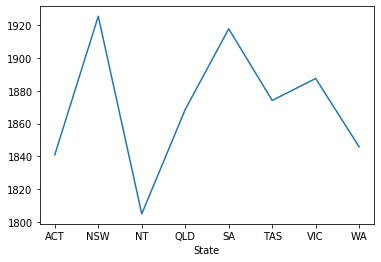

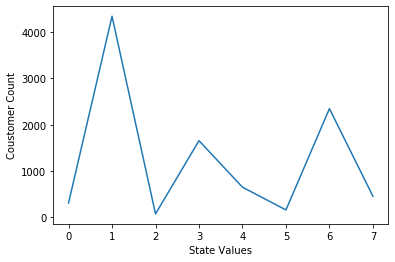

In [53]:
# YOUR CODE HERE
## ploting graph of the absolute number of customers in each state;
##the average SpendValue of customers in each state (dollars/customer)
mean_s.plot(x ='State', y='SpendValue', kind = 'line')
plt.show()
count_cus = [0,0,0,0,0,0,0,0]
for i in range (10000):
     count_cus[sales.iloc[i, 13]] = count_cus[sales.iloc[i, 13]] + 1
State_v = [0,1,2,3,4,5,6,7]
plt.plot(State_v, count_cus)
plt.xlabel('State Values')
# naming the y axis
plt.ylabel('Coustomer Count')
plt.show()
#raise NotImplementedError()

### Question:
Discuss these graphs and explain your conclusions.

For example, are there *significant* differences in the average spend in different states?  Are our customer spread evenly across Australia, or concentrated in particular areas? 

Write your answer in the next cell, and give reasons for your conclusions.

### Answer:

YOUR ANSWER HERE

In [ ]:
We can see in the graphs that mean spend value is different in different states.
Highest Mean Spent value is at NSW and lowest is at ACT. Similary It can be seen from 
graphs that there is huge difference in count of customers in different states YOUR ANSWER HERE

---

# Part C: Predicting Spending Levels (20 points)

Using the LinearRegression function from the Scikit-Learn library (**sklearn**), build a machine learning model for predicting the expected **SpendValue** for a customer.  

Measure the performance of your model using 10-fold cross-validation with a test set size of 20% and print various measures of how accurate your predictions are.

In [54]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend,SpendValue,LastSpendValue,SexValue,StateValue
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00,1615.0,2488.59,1,1
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20,1927.2,4295.34,1,6
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$1660.80,1660.8,1986.09,0,1
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$3041.10,3041.1,1532.64,0,1
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40,1764.4,2082.08,1,1


In [55]:
# YOUR CODE HERE
## Forming Regression model
reg = LinearRegression()
X = sales['Clicks'].values
Y = sales['SpendValue'].values
X = X.reshape((10000,1))
X_train = X[:7000]
X_test = X[7000:10000]
Y_train = Y[:7000]
Y_test = Y[7000:10000]
reg = reg.fit(X_train,Y_train)
#raise NotImplementedError()

### Analysis of Results

Print out the linear regression coefficients for all the input features, so that you can see which ones are more significant and which ones are unimportant.  

Hint 1: Since the scale of the input features is so different (0-1 for sex, 0-160000 for income, etc) multiply the linear regression coefficients by the average value of the corresponding column, to see how many dollars that column contributes to the total predicated-spend answer.

Hint 2: Could you graph the predicted and actual spendvalues of the test data, to visually see how good the linear regression results are?

Coefficients: 
 [-0.0394615]
Mean squared error: 1416893.69
Coefficient of determination: -0.00


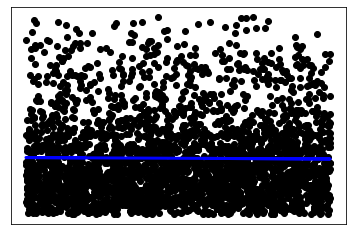

In [56]:
# YOUR CODE HERE
## Visualizing Regression 
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
#raise NotImplementedError()

### Discussion:

Discuss your conclusions about this linear regression model (in the next cell).  Which input features are most significant?

### Answer:
YOUR ANSWER HERE

In [ ]:
y_pred = reg.predict(X_test)

The coefficients
print('Coefficients: \n', reg.coef_)

The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, y_pred))

The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, y_pred))

Plot outputs
plt.scatter(X_test, Y_test, color='black') plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(()) plt.yticks(())

plt.show()

---
# Part D: Predicting Big Spenders (20 points)

In this section we want to build some machine learning models predict if a new customer is likely to be a big spender or not.  This will be a binary outcome (yes or no), so we can use machine learning *classification* algorithms.

Remember that our definition of 'Big-Spender' is that it is a client whose annual spending level (**SpendValue**) is in the top 25% of our clients.  So the exact dollar cutoff for big spenders will be different for each student, as each of you are working for a different company and are using a different dataset.

Choose two classification algorithms.  Use each one to build and then evaluate a 'big-spender' prediction model.

      SpendValue  Purchases
1979     1209.00          5
2426      923.95          7


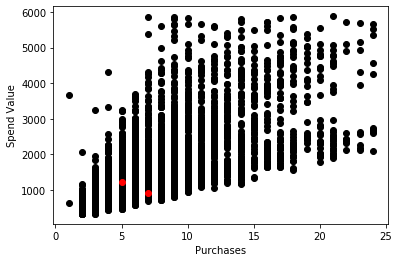

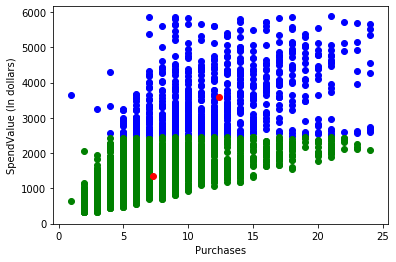

In [57]:
# YOUR CODE HERE
## Applying K-means algorithm 
X = sales[["SpendValue","Purchases"]].head(2500)
K = 2
Centroids = (X.sample(n=K))
print (Centroids)
plt.scatter(X["Purchases"],X["SpendValue"], c = 'black')
plt.scatter(Centroids["Purchases"],Centroids["SpendValue"], c = 'red')
plt.xlabel('Purchases')
plt.ylabel('Spend Value')
plt.show()
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Purchases"]-row_d["Purchases"])**2
            d2=(row_c["SpendValue"]-row_d["SpendValue"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos = 1
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1
        C.append(pos)
    X["Cluster"] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Purchases", "SpendValue"]]
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['SpendValue'] - Centroids['SpendValue']).sum() + (
                    Centroids_new['Purchases'] - Centroids['Purchases']).sum()
    Centroids = X.groupby(["Cluster"]).mean()[["Purchases", "SpendValue"]]
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Purchases"],data["SpendValue"],c=color[k])
plt.scatter(Centroids["Purchases"],Centroids["SpendValue"],c='red')
plt.xlabel('Purchases')
plt.ylabel('SpendValue (In dollars)')
plt.show()
#raise NotImplementedError()

### Discussion:

Discuss your conclusions about your two classification models (in the next cell).

Which classification algorithm gives the more accurate results? 

How accurate are the results from your best classifier?

### Answer:
YOUR ANSWER HERE

In [ ]:
I have used K means algorithm to classify between Big spenders and less spenders It can be seen in graphs. YOUR ANSWER HERE

---
# Part E: Business Recommendations (10 points)

The company you are doing this analysis for wants some recommendations from you about how to find new customers who are likely to be big spenders.  They are wondering if they should focus their advertising on a particular gender?  Or people in a given state, such as Victoria, or NSW?  Or aim at demographic groups who have high income level or medium income levels?  Or other strategies?  What recommendations will you give them?  

Write about 100 words describing your conclusions from your analysis, and your recommendations for the best strategy for attracting new big-spender customers.

## Recommendations:
YOUR ANSWER HERE

In [ ]:
##It is seen by linear regression that as the number of clicks increase the big spender increases so we need to do better marketing 
##so that our number clicks increases

In [ ]:
##Also we need to put more attention to NSW state where the big spenders are in large ammount. So that we serve them better and it 
##will attract others to spend big in this state.
## Also number of purchases are also directly proportional to spend values.